# Environment Setup

## Imports

In [ ]:
from snowflake.snowpark.session import Session
import snowflake.snowpark.functions as F
import snowflake.snowpark.types as T

import getpass
import pandas as pd

## Create Snowpark Session

In [ ]:
accountname = getpass.getpass() # ORGNAME-ACCOUNTNAME (separated by minus sign)

In [ ]:
username = getpass.getpass()    # SNOWFLAKE-USERNAME

In [ ]:
password = getpass.getpass()    # SNOWFLAKE-PASSWORD

In [ ]:
connection_parameters = {
    "account": accountname,
    "user": username,
    "password": password,
    "role": "SYSADMIN"
}

session = Session.builder.configs(connection_parameters).create()

## Create Virtual Warehouse (Compute)

In [ ]:
# Create a Virtual Warehouse
session.sql("CREATE OR REPLACE WAREHOUSE HOL_WH WITH WAREHOUSE_SIZE='X-SMALL'").collect()

## Create Database for HOL

In [ ]:
# Create Databse
session.sql("CREATE OR REPLACE DATABASE HOL_DB").collect()

## Load HOL data into Snowflake

In [ ]:
# Loading from local CSV-files
application_record_df = pd.read_csv('data/application_record.csv.zip')
credit_record_df = pd.read_csv('data/credit_record.csv.zip')

In [ ]:
# Upload to Snowflake
session.write_pandas(application_record_df, table_name='APPLICATION_RECORD', auto_create_table=True, overwrite=True)
session.write_pandas(credit_record_df, table_name='CREDIT_RECORD', auto_create_table=True, overwrite=True)

## Accept Anaconda Terms & Conditions to Enable 3rd-Party-Packages
https://docs.snowflake.com/en/developer-guide/udf/python/udf-python-packages.html

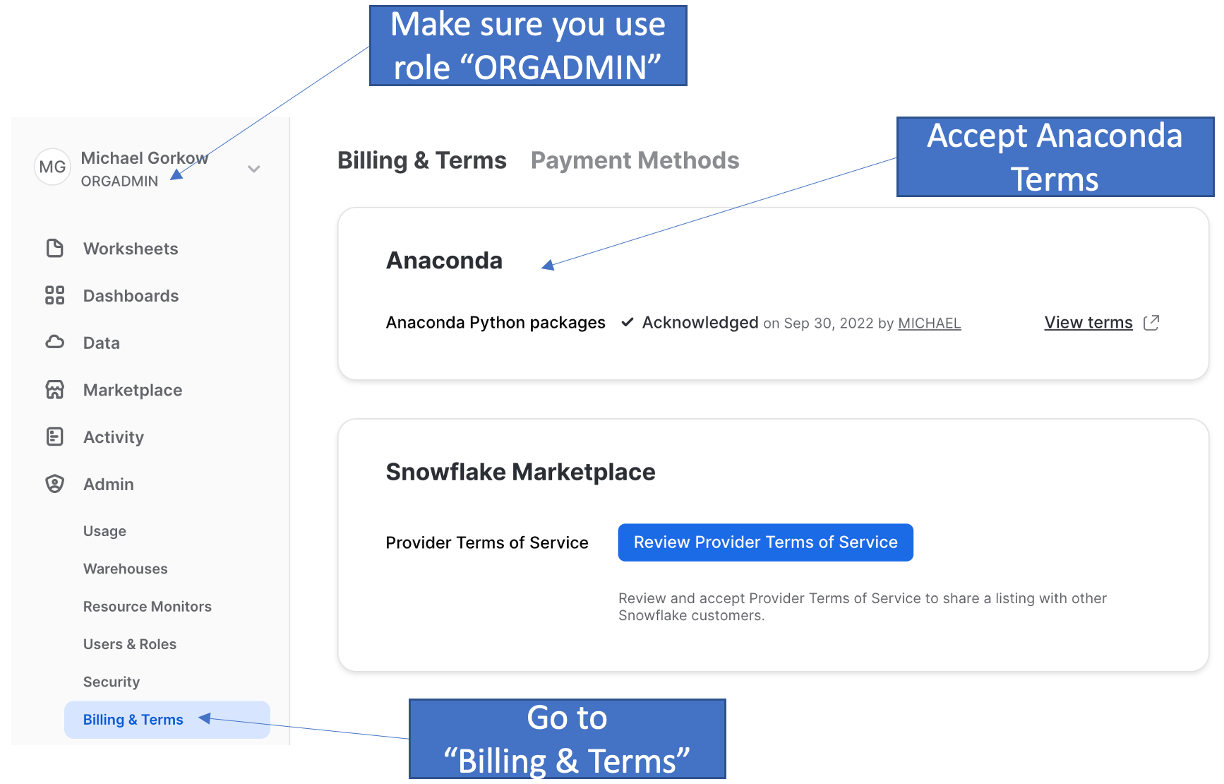